# US Macroeconomics from 01-01-1976 - 08-01-2022

## The intent of this project is to use time series data gathered from The St. Louis Federal Reserve website, FRED, for the purpose of using the Python Library "Pandas" to calculate the Unemployment Rate, the Labor Force Participation Rate and the Not In Labor Force Rate from 01-01-1976 - 08-01-2022 on a monthly basis. The resulting analysis is to review the time series data for recurring patterns.  Additionaly, Nominal and Real GDP are calculated for the 

### Please see the readme file for a more detailed explanation of data and data sources for all calculations shown in this project.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

## Reading in Data from a local CSV.

In [2]:
#Read the CSV file.
Econdata = pd.read_csv("https://raw.githubusercontent.com/boggs2louky/EAP/main/data/ECONDATA.csv")
GDP = pd.read_csv("https://raw.githubusercontent.com/boggs2louky/EAP/main/data/GDP.csv")
POP1980 = pd.read_csv("https://raw.githubusercontent.com/boggs2louky/EAP/main/data/USA1980.csv")
POP2020 = pd.read_csv("https://raw.githubusercontent.com/boggs2louky/EAP/main/data/USA2020.csv")
POV89_20 = pd.read_csv("https://raw.githubusercontent.com/boggs2louky/EAP/main/data/POV89_20.csv")

### An initial look at the table and associated data.

In [3]:
#Take a initial peek atthe first 5 rows of the dataframe.
Econdata.head()

,DATE,UNRATE,UIBEN,PSAVE,CREDEBT,CPI,LABPART,EMPLVL,UNEMPLOY,NINLAB,CIVPART,POPTHM
0,1/1/1976,7.9,18.3,11.7,205.52079,0.18018018,61.3,87400,7534,59919,61.3,217172
1,2/1/1976,7.7,17.2,12.3,206.70929,0.35971223,61.3,87672,7326,60068,61.3,217315
2,3/1/1976,7.6,17.5,12.2,208.33857,0.17921147,61.3,87985,7230,60091,61.3,217455
3,4/1/1976,7.7,16.7,11.7,210.50006,0.357781753,61.6,88416,7330,59783,61.6,217607
4,5/1/1976,7.4,16,12.3,211.40742,0.713012478,61.5,88794,7053,59918,61.5,217773


In [4]:
#Take a initial peek atthe last 5 rows of the dataframe, notice the hashtags/numeric symbol in the cells.
Econdata.tail()

,DATE,UNRATE,UIBEN,PSAVE,CREDEBT,CPI,LABPART,EMPLVL,UNEMPLOY,NINLAB,CIVPART,POPTHM
557,6/1/2022,3.6,18.1,3,4621.87848,1.373607576,62.2,158111,5912,99812,62.2,333028
558,7/1/2022,3.5,18.7,3.5,4647.98103,-0.011811914,62.1,158290,5670,100051,62.1,333137
559,8/1/2022,3.7,19.1,3.5,4680.22242,#,62.4,158732,6014,99438,62.4,333240
560,9/1/2022,3.5,#,#,#,#,62.3,158936,5753,99667,62.3,#
561,10/1/2022,#,#,#,#,#,#,#,#,#,#,#


## Using built-in panadas functions to remove '#' symbol from dataframe and replace with '0's, and then removing two rows (9/1/2022 and 10/1/2022) since those rows have zero values that cannot be used in the calculations.

In [5]:
#Dropping uneeded columns
Econdata.drop(['UIBEN', 'PSAVE', 'CREDEBT', 'CPI', 'CIVPART', 'UNRATE'], axis=1, inplace=True)

In [6]:
#Looking at the tail again after dropping the five columns.
Econdata.tail()

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
557,6/1/2022,62.2,158111,5912,99812,333028
558,7/1/2022,62.1,158290,5670,100051,333137
559,8/1/2022,62.4,158732,6014,99438,333240
560,9/1/2022,62.3,158936,5753,99667,#
561,10/1/2022,#,#,#,#,#


In [7]:
#removing/cleaning the data. I want to remove the '#' in that row and replace with zero's
Econdata.loc[561]

DATE        10/1/2022
LABPART             #
EMPLVL              #
UNEMPLOY            #
NINLAB              #
POPTHM              #
Name: 561, dtype: object

In [8]:
#This replaces the row 561 having #'s in their repective column with 0's in their place.
Econdata = Econdata.replace(to_replace='#', value='0')
Econdata.tail()

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
557,6/1/2022,62.2,158111,5912,99812,333028
558,7/1/2022,62.1,158290,5670,100051,333137
559,8/1/2022,62.4,158732,6014,99438,333240
560,9/1/2022,62.3,158936,5753,99667,0
561,10/1/2022,0,0,0,0,0


In [9]:
# No value for Total Population in the month of Sept, resulted in removing that row as well.
Econdata.drop(561)

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
0,1/1/1976,61.3,87400,7534,59919,217172
1,2/1/1976,61.3,87672,7326,60068,217315
2,3/1/1976,61.3,87985,7230,60091,217455
3,4/1/1976,61.6,88416,7330,59783,217607
4,5/1/1976,61.5,88794,7053,59918,217773
...,...,...,...,...,...,...
556,5/1/2022,62.3,158426,5950,99302,332928
557,6/1/2022,62.2,158111,5912,99812,333028
558,7/1/2022,62.1,158290,5670,100051,333137
559,8/1/2022,62.4,158732,6014,99438,333240


In [10]:
#Lets drop row 560 and 561 all together from the Dataframe.
Econdata.drop(Econdata.index[560:562], axis=0, inplace=True)
Econdata

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
0,1/1/1976,61.3,87400,7534,59919,217172
1,2/1/1976,61.3,87672,7326,60068,217315
2,3/1/1976,61.3,87985,7230,60091,217455
3,4/1/1976,61.6,88416,7330,59783,217607
4,5/1/1976,61.5,88794,7053,59918,217773
...,...,...,...,...,...,...
555,4/1/2022,62.2,158105,5941,99513,332863
556,5/1/2022,62.3,158426,5950,99302,332928
557,6/1/2022,62.2,158111,5912,99812,333028
558,7/1/2022,62.1,158290,5670,100051,333137


In [11]:
#Add to two new Columns to store our Unemployment Rate calculation and Labor Force Participation Rate (values are zero, used to take place of calculation values prior Unemployment Rate/Labor Force Participation Rate Calculations.)
#Econdata = pd.DataFrame(Econdata)
#Econdata['UNEMPLYRT'] = '0'
#Econdata['LBFRCPRT'] = '0'
#del Econdata[('UNEMPLYRT', 'LBFRCPRT')] error on my part for a concatenated column#
#Econdata

In [12]:
#Selected a random column (series) within the DataFrame to determine the total number of rows that exist.
Econdata['LABPART'].describe(include='all')

count      560
unique      63
top       66.1
freq        29
Name: LABPART, dtype: object

In [13]:
#Reviewing the dtypes for each column for the purpose of calculating the data into the respective columns for Unemployment Rate (UNEMPLYRT) and Labor Force Participation Rate (LBFRCPRT).
Econdata.dtypes

DATE        object
LABPART     object
EMPLVL      object
UNEMPLOY    object
NINLAB      object
POPTHM      object
dtype: object

In [14]:
#Changing the 'DATE' Series dtype from Object to a datetime64[ns])
Econdata = pd.DataFrame(Econdata) 
Econdata['DATE'] = Econdata['DATE'].astype('datetime64')
Econdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      560 non-null    datetime64[ns]
 1   LABPART   560 non-null    object        
 2   EMPLVL    560 non-null    object        
 3   UNEMPLOY  560 non-null    object        
 4   NINLAB    560 non-null    object        
 5   POPTHM    560 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 26.4+ KB


In [15]:
#Changing the remaning Columns to their needed dtypes for calculation purposes.
Econdata['EMPLVL'] = Econdata['EMPLVL'].astype('int64')
Econdata['UNEMPLOY'] = Econdata['UNEMPLOY'].astype('int64')
Econdata['NINLAB'] = Econdata['NINLAB'].astype('int64')
Econdata['POPTHM'] = Econdata['POPTHM'].astype('int64')
#Econdata['UNEMPLYRT'] = Econdata['UNEMPLYRT'].astype('float64')
#Econdata['LBFRCPRT'] = Econdata['LBFRCPRT'].astype('float64')
Econdata

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM
0,1976-01-01,61.3,87400,7534,59919,217172
1,1976-02-01,61.3,87672,7326,60068,217315
2,1976-03-01,61.3,87985,7230,60091,217455
3,1976-04-01,61.6,88416,7330,59783,217607
4,1976-05-01,61.5,88794,7053,59918,217773
...,...,...,...,...,...,...
555,2022-04-01,62.2,158105,5941,99513,332863
556,2022-05-01,62.3,158426,5950,99302,332928
557,2022-06-01,62.2,158111,5912,99812,333028
558,2022-07-01,62.1,158290,5670,100051,333137


## Getting a description of data and performing Calculations for Unemployment Rate, Labor Force Participation Rate, and Not in Labor Force Rate. 

In [16]:
Econdata.describe()

,EMPLVL,UNEMPLOY,NINLAB,POPTHM
count,560.000000,560.000000,560.000000,560.000000
mean,128053.603571,8381.905357,74196.226786,277510.985714
std,19538.848691,2422.273400,13084.534715,36502.860355
min,87400.000000,5481.000000,59224.000000,217172.000000
25%,113020.000000,6748.750000,62887.250000,243280.750000
50%,133169.000000,7789.500000,68305.000000,278721.500000
75%,143730.500000,8942.000000,85290.250000,311066.000000
max,158866.000000,23038.000000,103538.000000,333240.000000


# Calculating the Unemployment Rate

### The unemployment rate is one of many indicators that the Federal Resrve uses to determine whether to raise interest rates in the US. Low unemployment is viewed as a strong ecomomy and thus the Federal Reserve may increase interest rates which it has currently been doing. Whereas, high unemployment can be viewed as a need to lower the interest rate. In either case the intent is to control inflationary pressures within the US economy. 

In [17]:
#Calculate the Unemployment Rate (UNEMPLYRT) based on the following: # of Unemployed (UNEMPLOY) / # in Labor Force (EMPLVL) * 100.
Econdata['UNEMPLYRT'] = (Econdata['UNEMPLOY'] / Econdata['EMPLVL']) * 100
Econdata

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM,UNEMPLYRT
0,1976-01-01,61.3,87400,7534,59919,217172,8.620137
1,1976-02-01,61.3,87672,7326,60068,217315,8.356146
2,1976-03-01,61.3,87985,7230,60091,217455,8.217310
3,1976-04-01,61.6,88416,7330,59783,217607,8.290355
4,1976-05-01,61.5,88794,7053,59918,217773,7.943104
...,...,...,...,...,...,...,...
555,2022-04-01,62.2,158105,5941,99513,332863,3.757629
556,2022-05-01,62.3,158426,5950,99302,332928,3.755697
557,2022-06-01,62.2,158111,5912,99812,333028,3.739145
558,2022-07-01,62.1,158290,5670,100051,333137,3.582033


## Plotting the Unemployment Rate 

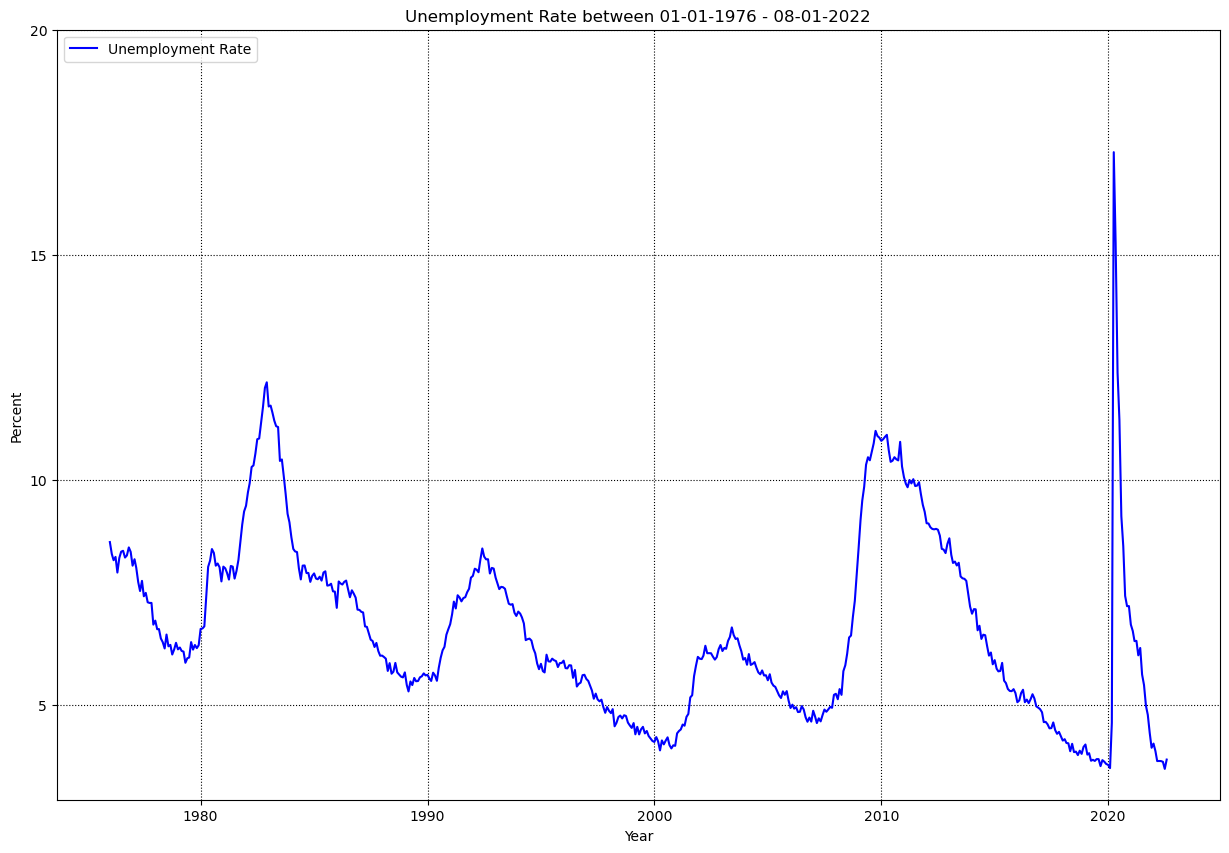

In [44]:
# Plot of Unemployment Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(Econdata.DATE, Econdata.UNEMPLYRT, 'blue', label='Unemployment Rate')


plt.title('Unemployment Rate between 01-01-1976 - 08-01-2022')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.yticks([5, 10, 15, 20])
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()

# Using plotly.js for interactive scrolling of graph
fig = px.line(Econdata, x = 'DATE', y = 'UNEMPLYRT')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

The plot above of the Unemployment Rate from 01-01-1976 - 08-01-2022 shows that a cyclical patterns exist at or about every tens years (peaks). The unemployment rate us considered a "lagging indicator" (https://www.investopedia.com/terms/u/unemploymentrate.asp) meaning that it is indicative of economic forces after they have occurred and is not predictive in representing economic forces.  Additionally, please see the following website to help correlate high/low unemployment periods with a yearly breakdown of "notable events". https://www.thebalancemoney.com/unemployment-rate-by-year-3305506  

## The mean of the Unemployment Rate from 01/01/1976 - 08/01-2022.

In [19]:
# The mean of the unemployment rate for the time period between 01-01-1976 - 08-01-2022.
Econdata['UNEMPLYRT'].mean()
#The output below (6.68%) shows that approximately 6.68% of the employable population (persons 16-55) was unemployed throughtout the time period as stated above.
#The Federal Reserve has stated that unemployment rates of between 4.0% - 5.0% are acceptable levels. However, remember this is just a mean of unemployment rate based (monthly) for the respective time period.
#Basically, on average for that the selected time period unemployment would have been above acceptable levels based on the Federal Reserve range. Time series can be misleading especially when dealing with means/averages.

6.675843737750175

# Calculating the Labor Force Participation Rate 

In [20]:
#Calculate the Labor Force Participation Rate (LBFRCPRT) based on the following: # in Labor Force (EMPLVL) / Total Population (POPTHM) * 100.
Econdata['LBFRCPRT'] = (Econdata['EMPLVL'] / Econdata['POPTHM']) * 100
Econdata

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM,UNEMPLYRT,LBFRCPRT
0,1976-01-01,61.3,87400,7534,59919,217172,8.620137,40.244599
1,1976-02-01,61.3,87672,7326,60068,217315,8.356146,40.343280
2,1976-03-01,61.3,87985,7230,60091,217455,8.217310,40.461245
3,1976-04-01,61.6,88416,7330,59783,217607,8.290355,40.631046
4,1976-05-01,61.5,88794,7053,59918,217773,7.943104,40.773650
...,...,...,...,...,...,...,...,...
555,2022-04-01,62.2,158105,5941,99513,332863,3.757629,47.498520
556,2022-05-01,62.3,158426,5950,99302,332928,3.755697,47.585664
557,2022-06-01,62.2,158111,5912,99812,333028,3.739145,47.476789
558,2022-07-01,62.1,158290,5670,100051,333137,3.582033,47.514986


## Plotting the Labor Force Participation Rate

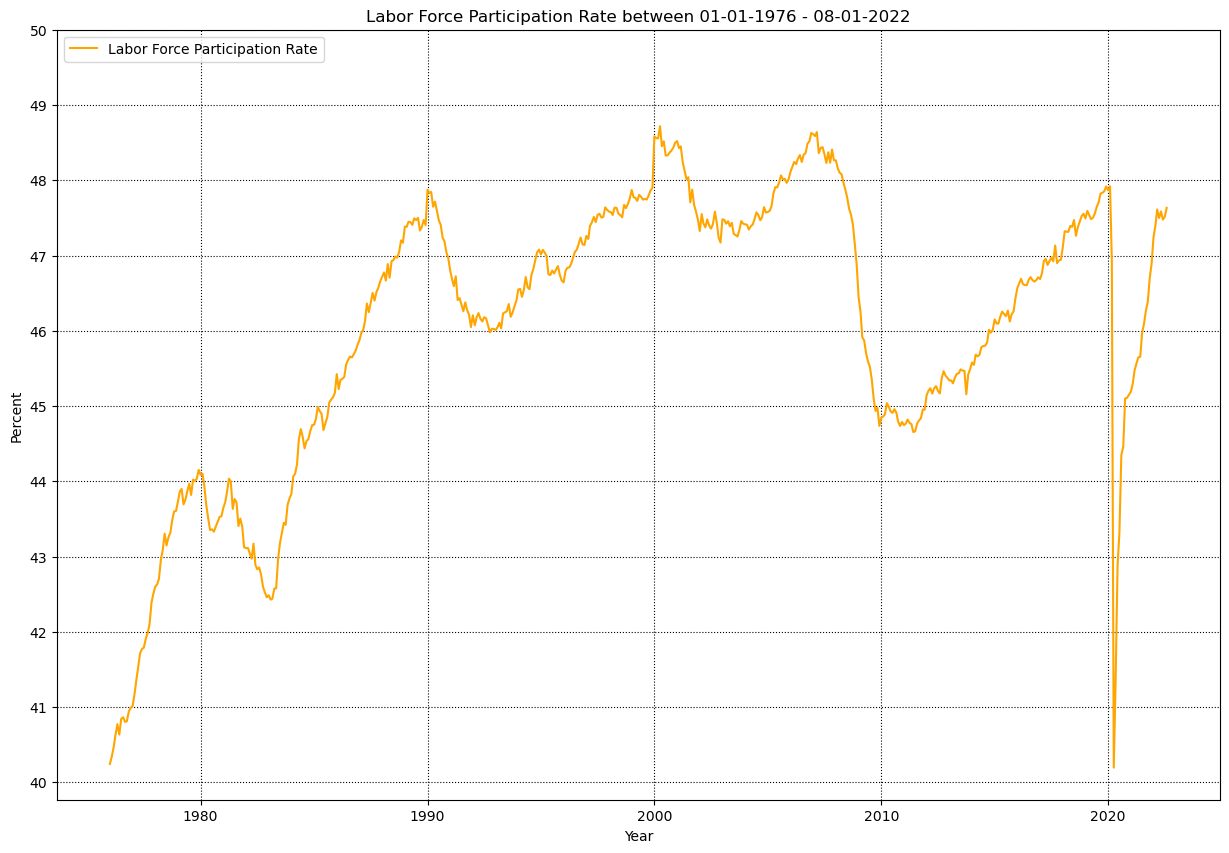

In [45]:
# Plot of Labor Force Participation Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(Econdata.DATE, Econdata.LBFRCPRT, 'orange', label='Labor Force Participation Rate')


plt.title('Labor Force Participation Rate between 01-01-1976 - 08-01-2022')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.yticks([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()

# Using plotly.js for interactive scrolling of graph
fig = px.line(Econdata, x = 'DATE', y = 'LBFRCPRT')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

Labor Force Participation Rate (LFPR) as of Jan 1976 was at 40%. The highest LFPR was in Apr of 2000 having 48.7%. The plot above shows Labor Force Participation peaking (having high percentages and/or rates) on average every ten years which is simliar to unemployment. Unemployment and Labor Force Participation are considered in conjunction by economists to better understand the any economy's real unemployment rate. Since employment levels are usually for persons between th ages of 16 yrs and older so total population would not be fit for determining the Labor Force participation and in fact is highly connected to demographic trends within any one national economy.  Please see the following web page for a description of economic circumstances for the respective years to help in determining the peaks and troughs as shown in the above plot for Labor Force Participation Rate, https://www.thebalancemoney.com/unemployment-rate-by-year-3305506.          

## Calculating the mean of Labor Force Participation Rates from 01/01/1976 - 08/01/2022.

In [22]:
# The mean of the Labor Force Participation rate for the time period between 01-01-1976 - 08-01-2022.
Econdata['LBFRCPRT'].mean()
# The Labor Force Participation Rate is on average 46.02% which excludes shifts in age cohorts when calculated here. More meaningful rates are calculated based on age cohorts which has not been performed here, providing greater insight at given time intervals.
# However, it is amazing to think that on average between 01-01-1976 - 08-01-2022 that almost 46% of the workforce was actively employed, meaning "Merica" is a very laborious country!

46.0189219295556

# Calculating Persons Not In the Labor Force Rate

In [23]:
#Calculate the percent of persons Not in Labor Force Rate (NILBRFRCRT) as a percent of total population = # of persons Not in Labor Force (NINLAB) / total population (POPTHM) * 100.
Econdata['NILBRFRCRT'] = (Econdata['NINLAB'] / Econdata['POPTHM']) * 100
Econdata

,DATE,LABPART,EMPLVL,UNEMPLOY,NINLAB,POPTHM,UNEMPLYRT,LBFRCPRT,NILBRFRCRT
0,1976-01-01,61.3,87400,7534,59919,217172,8.620137,40.244599,27.590573
1,1976-02-01,61.3,87672,7326,60068,217315,8.356146,40.343280,27.640982
2,1976-03-01,61.3,87985,7230,60091,217455,8.217310,40.461245,27.633763
3,1976-04-01,61.6,88416,7330,59783,217607,8.290355,40.631046,27.472921
4,1976-05-01,61.5,88794,7053,59918,217773,7.943104,40.773650,27.513971
...,...,...,...,...,...,...,...,...,...
555,2022-04-01,62.2,158105,5941,99513,332863,3.757629,47.498520,29.896083
556,2022-05-01,62.3,158426,5950,99302,332928,3.755697,47.585664,29.826869
557,2022-06-01,62.2,158111,5912,99812,333028,3.739145,47.476789,29.971053
558,2022-07-01,62.1,158290,5670,100051,333137,3.582033,47.514986,30.032989


## Plotting the Percent of Persons Not In the Labor Force

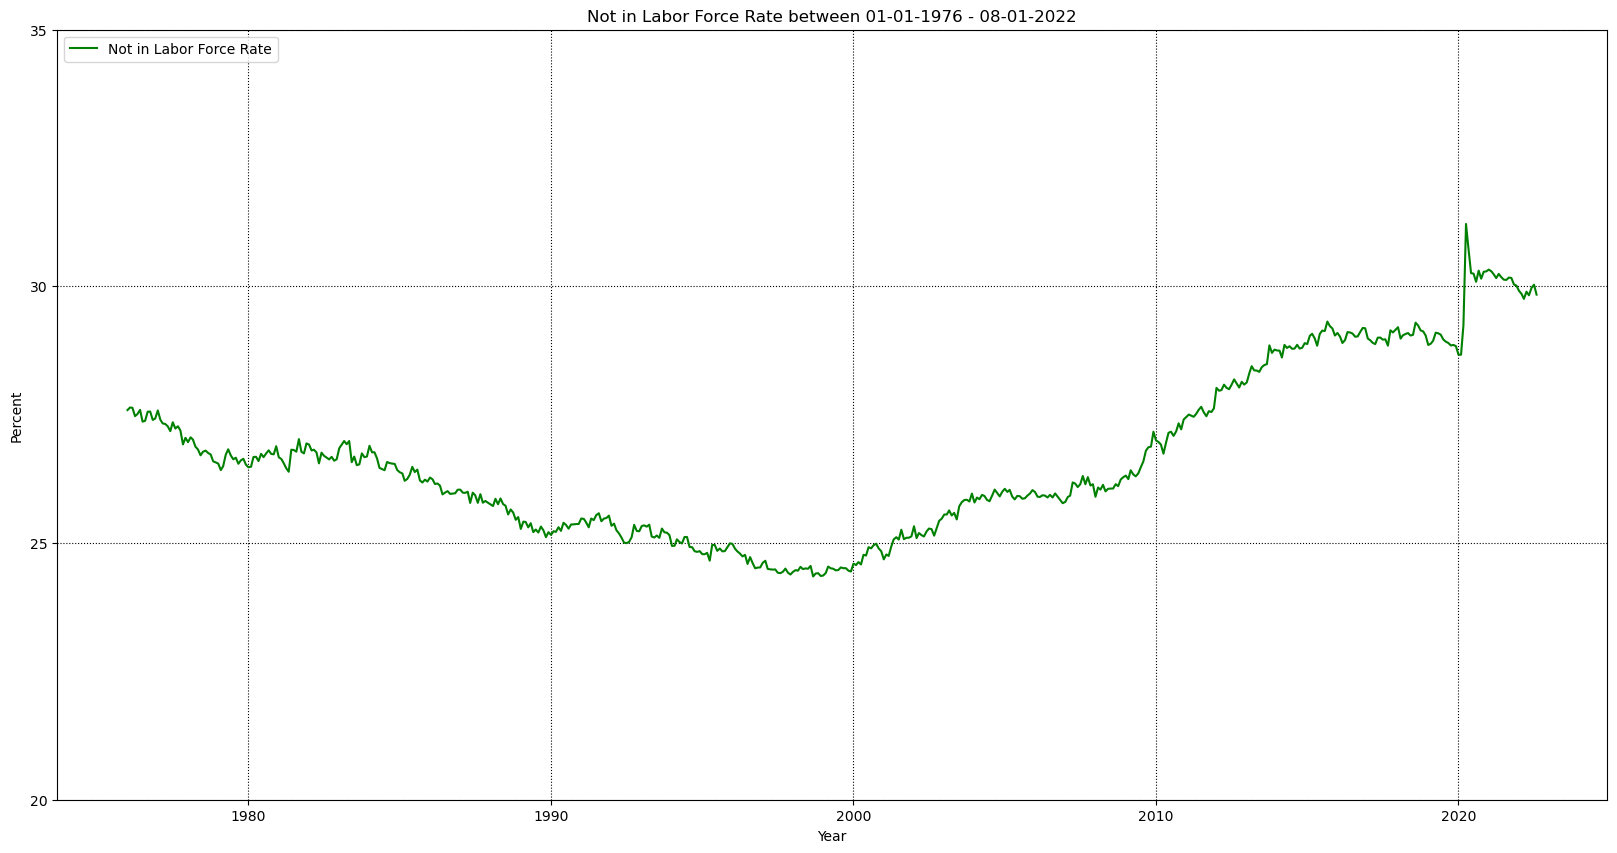

In [46]:
# Plot of Not in Labor Force Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(20,10))

plt.plot(Econdata.DATE, Econdata.NILBRFRCRT, 'green', label='Not in Labor Force Rate')


plt.title('Not in Labor Force Rate between 01-01-1976 - 08-01-2022')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.yticks([20, 25, 30, 35])
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()

# Using plotly.js for interactive scrolling of graph
fig = px.line(Econdata, x = 'DATE', y = 'NILBRFRCRT')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

## Calculating the mean of Persons Not In the Labor Force Rate from 01/01/1976 - 08/01/2022.

The mean of the Not in Labor Force Rate (NILBRFRCRT) for the time period between 01-01-1976 - 08-01-2022 (shown above).
The Not in Labor Force Rate is a portion of the population that is no longer employed or looking for work. This percentage/rate has been relatively stable since 1976 ranging from a low of 24% in 1998 to a high of 31.2% as of Apr 2020. The Not in Labor Force Rate again is tied to demographics in the national economy. Please see the following Bureau of Labor Statistics for an explanation of "Not in the Labor Force" and the impacts of demographics upon our national economy.  https://www.bls.gov/opub/btn/volume-4/people-who-are-not-in-the-labor-force-why-arent-they-working.htm

In [25]:
Econdata['NILBRFRCRT'].mean()

26.625296611609098

## Plotting Unemployment Rate, Labor Force Participation Rate, and Not in Labor Force Rate from 01/01/1976 - 08/01/2022.

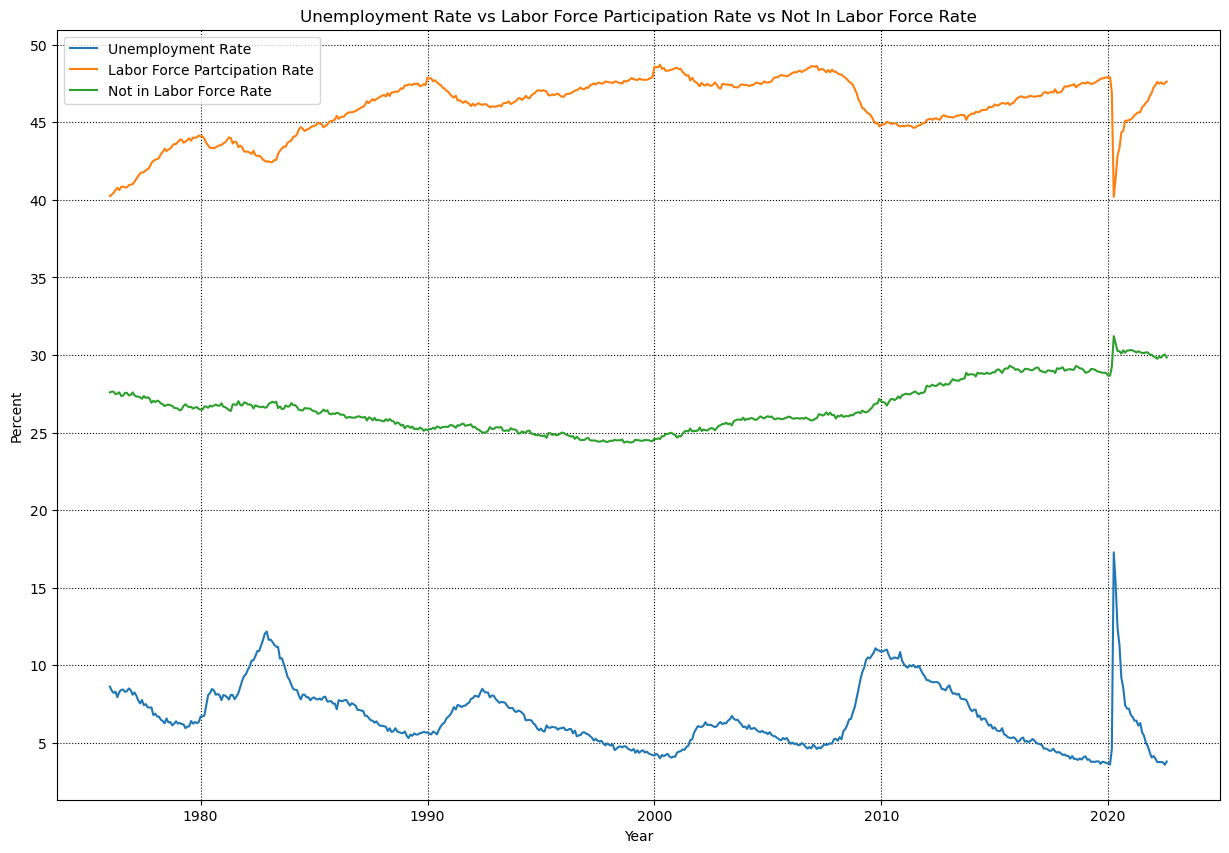

In [57]:
# Plot of Unemployment Rate/Labor Force Rate/Not in Labor Force Rate between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(Econdata.DATE, Econdata.UNEMPLYRT, label='Unemployment Rate')
plt.plot(Econdata.DATE, Econdata.LBFRCPRT, label='Labor Force Partcipation Rate')
plt.plot(Econdata.DATE, Econdata.NILBRFRCRT, label='Not in Labor Force Rate')

plt.title('Unemployment Rate vs Labor Force Participation Rate vs Not In Labor Force Rate')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.yticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()

# Using plotly.js for interactive scrolling of graph
fig = px.line(Econdata, x = 'DATE', y = ['UNEMPLYRT', 'LBFRCPRT', 'NILBRFRCRT'])
fig.update_xaxes(rangeslider_visible = True)
fig.show()

## The three rates as shown above (Unemployment Rate, Labor Force Participation Rate, and Not in Labor Force Rate) are important calculations that the Federal Reserve uses to determine the raising or lowering of interest rates, impacting all US citizens. Please refer to the following link: https://www.investopedia.com/articles/investing/103015/how-labor-force-participation-rate-affects-us-unemployment.asp  for more info regarding the importance of these rates as related to the US economy.

## The unemployment rate over the period from 1976 - 2022 has ebbed and flowed usually in relation the the larger economy as a whole. Unemployment spiked during the early 1980's (Recession), early 1990's (Recession), early 2000's (Dotcom Bubble), 2010's (Great Recession) and early 2020's (COVID-19). (Notice a decennial pattern with a lag time?). The most recent and largest spike in unemployment during the selected time period was a result of the COVID-19 pandemic. Please see the following link for more insight into historical market volatility and causes: https://www.thebalancemoney.com/unemployment-rate-by-year-3305506.

# Nominal Gross Domestic Product (GDP) 01-01-1976 - 04-01-2022 in Billions of Dollars to Real GDP (Quarterly Frequencies).
## Nominal GDP = C + I + G + (X - I)
### C = Consumer Spending: The total amount of spending that individuals spent on goods and services for personal use, I = Business Investment: The amount of business investment that is spent to invest in new capital improvements or business expansions, G = Government Spending: The amount of government spending present in the economy, including on new infrastructure, (X – I) = Net Exports: The amount a country gains on exports minus how much it spends on imports. 
## Real GDP = Nominal * 100 / Price Index (GDP Implicit Price Deflator)
## GDP - The total monetary or market value of all finished goods and services produced within a country's borders in a specific time period. 

In [27]:
GDP.head()

,DATE,PCEC,PRVCFC,GPDI,GCE,EXPGS,IMPGS,GDPDEF
0,1/1/1976,1109.908,189.571,304.638,401.291,143.588,138.938,30.891
1,4/1/1976,1129.540,193.669,322.303,400.985,146.621,147.116,31.202
2,7/1/1976,1158.806,198.561,328.307,403.517,151.775,155.848,31.605
3,10/1/1976,1192.408,204.247,337.650,410.818,156.076,162.680,32.172
4,1/1/1977,1228.212,210.725,360.313,421.202,155.354,176.433,32.690


In [28]:
GDP.describe()

,PCEC,PRVCFC,GPDI,GCE,EXPGS,IMPGS,GDPDEF
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.00000
mean,7004.830086,1330.275699,1840.868532,1992.535129,1161.296065,1485.292796,76.92778
std,4351.205652,872.051143,1091.515128,1119.578466,818.031789,1066.117489,24.14332
min,1109.908000,189.571000,304.638000,400.985000,143.588000,138.938000,30.89100
25%,3125.747500,573.290250,884.491750,1041.152250,376.917250,522.366250,57.31600
50%,6166.340500,1107.101000,1844.878500,1681.948000,968.743500,1197.725000,75.97850
75%,10397.916500,1953.166250,2643.729250,3131.899500,1917.981750,2602.805000,96.70500
max,17261.338000,3530.918000,4671.027000,4412.776000,3038.844000,4074.409000,126.90700


In [29]:
#Nominal GDP based on spending in Billions of dollars, Quarterly
GDP['GDPSB'] = ((GDP['PCEC'] + GDP['PRVCFC']) + GDP['GPDI'] + GDP['GCE'] + (GDP['EXPGS'] - GDP['IMPGS']))
GDP

,DATE,PCEC,PRVCFC,GPDI,GCE,EXPGS,IMPGS,GDPDEF,GDPSB
0,1/1/1976,1109.908,189.571,304.638,401.291,143.588,138.938,30.891,2010.058
1,4/1/1976,1129.540,193.669,322.303,400.985,146.621,147.116,31.202,2046.002
2,7/1/1976,1158.806,198.561,328.307,403.517,151.775,155.848,31.605,2085.118
3,10/1/1976,1192.408,204.247,337.650,410.818,156.076,162.680,32.172,2138.519
4,1/1/1977,1228.212,210.725,360.313,421.202,155.354,176.433,32.690,2199.373
...,...,...,...,...,...,...,...,...,...
181,4/1/2021,15813.545,3135.973,3943.400,4124.384,2503.089,3337.485,117.922,26182.906
182,7/1/2021,16147.297,3222.491,4109.122,4183.144,2553.333,3442.476,119.712,26772.911
183,10/1/2021,16517.976,3315.169,4499.171,4246.682,2733.037,3647.745,121.708,27664.290
184,1/1/2022,16874.769,3422.421,4671.027,4311.366,2811.225,3927.908,124.174,28162.900


In [30]:
GDP = pd.DataFrame(GDP) 
GDP['DATE'] = GDP['DATE'].astype('datetime64')

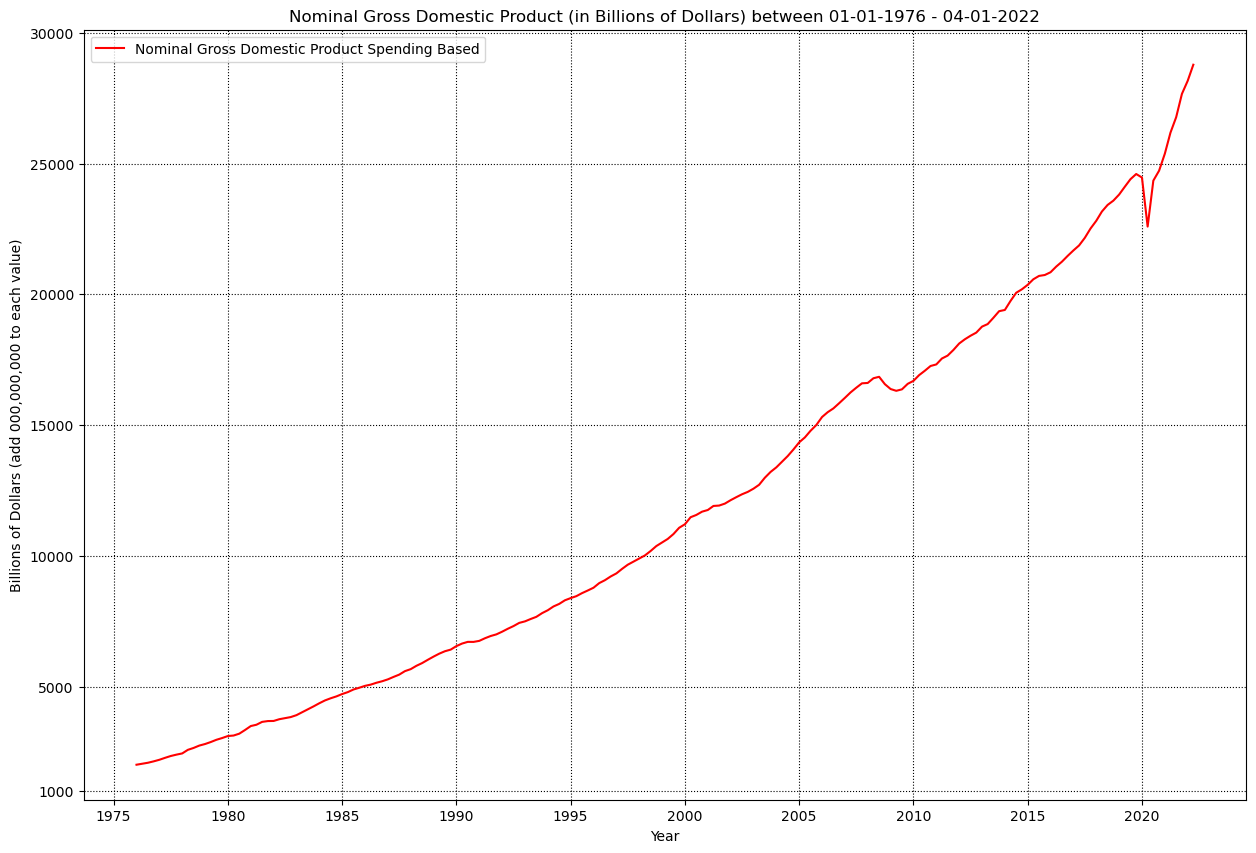

In [31]:
# Plot of Gross Domestic Product (Nominal, Based on Spending) between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(GDP.DATE, GDP.GDPSB, 'red', label='Nominal Gross Domestic Product Spending Based')

plt.title('Nominal Gross Domestic Product (in Billions of Dollars) between 01-01-1976 - 04-01-2022')
plt.ylabel('Billions of Dollars (add 000,000,000 to each value)')
plt.xlabel('Year')
plt.yticks([1000, 5000, 10000, 15000, 20000, 25000, 30000])
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()

# Using plotly.js for interactive scrolling of graph
fig = px.line(GDP, x = 'DATE', y = 'GDPSB')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

Nominal GDP - the current market prices for the vaulation of all goods in services produced in an economy. Nominal GDP doesn't consider the changes in prices due to inflation. https://www.investopedia.com/terms/n/nominalgdp.asp  The graph above is of nominal GDP from Jan 1976 - Jan 2022. The growth of US GDP for this time period begins in 1976 with the US economy having 2,010,058,000,000 (billions of dollars shown in graph) to a high of  28,779,394,000,000 (billions of dollars shown in graph). So, nominal GDP has continually grown for the US since 1976. Again, nominal GDP does not include the changes in prices due to inflation. The Real GDP will be discussed below. 

In [32]:
GDP.head()

,DATE,PCEC,PRVCFC,GPDI,GCE,EXPGS,IMPGS,GDPDEF,GDPSB
0,1976-01-01,1109.908,189.571,304.638,401.291,143.588,138.938,30.891,2010.058
1,1976-04-01,1129.540,193.669,322.303,400.985,146.621,147.116,31.202,2046.002
2,1976-07-01,1158.806,198.561,328.307,403.517,151.775,155.848,31.605,2085.118
3,1976-10-01,1192.408,204.247,337.650,410.818,156.076,162.680,32.172,2138.519
4,1977-01-01,1228.212,210.725,360.313,421.202,155.354,176.433,32.690,2199.373


In [33]:
#Calculation for Real GDP
GDP['GDPR'] = GDP['GDPSB'] * 100 / GDP['GDPDEF']

In [34]:
GDP

,DATE,PCEC,PRVCFC,GPDI,GCE,EXPGS,IMPGS,GDPDEF,GDPSB,GDPR
0,1976-01-01,1109.908,189.571,304.638,401.291,143.588,138.938,30.891,2010.058,6506.937296
1,1976-04-01,1129.540,193.669,322.303,400.985,146.621,147.116,31.202,2046.002,6557.278380
2,1976-07-01,1158.806,198.561,328.307,403.517,151.775,155.848,31.605,2085.118,6597.430786
3,1976-10-01,1192.408,204.247,337.650,410.818,156.076,162.680,32.172,2138.519,6647.143479
4,1977-01-01,1228.212,210.725,360.313,421.202,155.354,176.433,32.690,2199.373,6727.968798
...,...,...,...,...,...,...,...,...,...,...
181,2021-04-01,15813.545,3135.973,3943.400,4124.384,2503.089,3337.485,117.922,26182.906,22203.580333
182,2021-07-01,16147.297,3222.491,4109.122,4183.144,2553.333,3442.476,119.712,26772.911,22364.433808
183,2021-10-01,16517.976,3315.169,4499.171,4246.682,2733.037,3647.745,121.708,27664.290,22730.050613
184,2022-01-01,16874.769,3422.421,4671.027,4311.366,2811.225,3927.908,124.174,28162.900,22680.190700


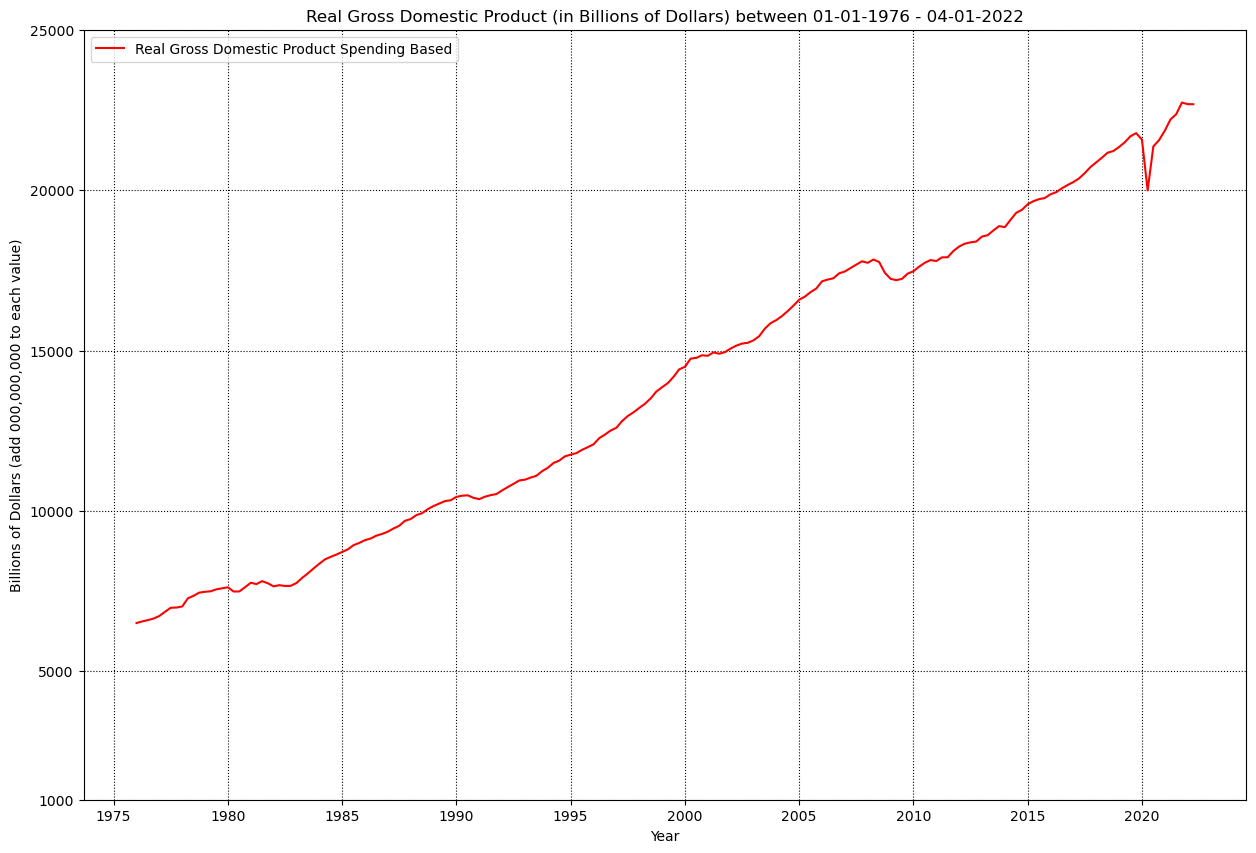

In [35]:
# Plot of Gross Domestic Product (Real GDP) between the years of 01-01-1976 - 08-01-2022.
plt.figure(figsize=(15,10))

plt.plot(GDP.DATE, GDP.GDPR, 'red', label='Real Gross Domestic Product Spending Based')

plt.title('Real Gross Domestic Product (in Billions of Dollars) between 01-01-1976 - 04-01-2022')
plt.ylabel('Billions of Dollars (add 000,000,000 to each value)')
plt.xlabel('Year')
plt.yticks([1000, 5000, 10000, 15000, 20000, 25000])
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()

# Using plotly.js for interactive scrolling of graph
fig = px.line(GDP, x = 'DATE', y = 'GDPR')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

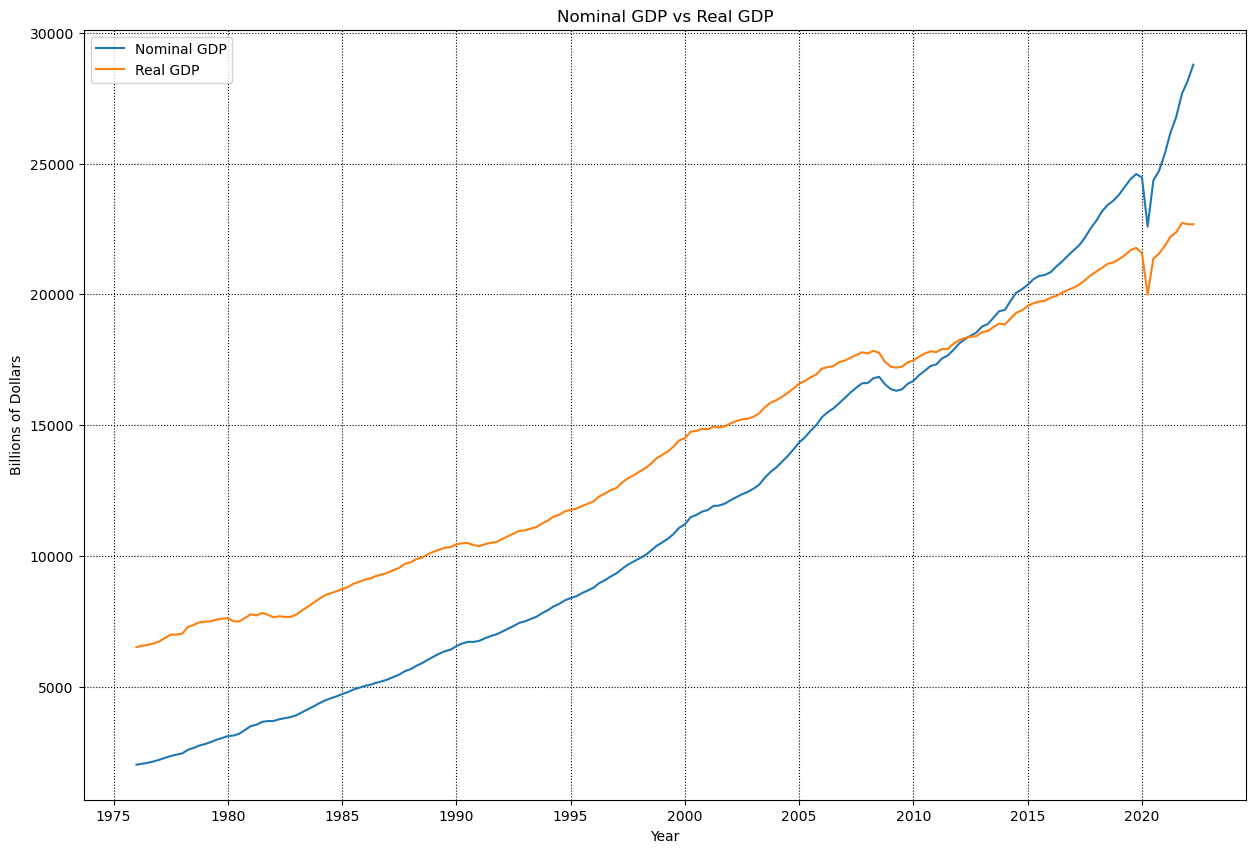

In [56]:
plt.figure(figsize=(15,10))

plt.plot(GDP.DATE, GDP.GDPSB, label='Nominal GDP')
plt.plot(GDP.DATE, GDP.GDPR, label='Real GDP')

plt.title('Nominal GDP vs Real GDP')
plt.ylabel('Billions of Dollars')
plt.xlabel('Year')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()

# Using plotly.js for interactive scrolling of graph
fig = px.line(GDP, x = 'DATE', y = ['GDPSB', 'GDPR'])
fig.update_xaxes(rangeslider_visible = True)
fig.show()

# Population Pyramid for the USA 1980 and 2020.

In [36]:
POP1980.head()

,Age,M,F
0,0-4,8547621,8032156
1,5-9,8690319,8150446
2,10-14,9692466,8916537
3,15-19,10985213,10206011
4,20-24,10929571,10621793


In [37]:
y = POP1980['Age']
x1 = POP1980['M']
x2 = POP1980['F'] * -1

#Creating figure
fig = go.Figure()

# Add Trace to figure
fig.add_trace(go.Bar(
    y=y,
    x=x1,
    name='Male',
    orientation='h'
))

# Add Trace to figure
fig.add_trace(go.Bar(
    y=y,
    x=x2,
    name='Female',
    orientation='h'
))

# Update Figure layout
fig.update_layout(
    template = 'plotly_white',
    title = 'Age Pyramid for USA 1980',
    title_font_size = 24,
    barmode = 'relative',
    bargap = 0.0,
    bargroupgap = 0,
    
        xaxis = dict(
        tickvals = [-10000000, -5000000, 0, 5000000, 10000000],
        ticktext = ['10M', '5M', '0', '5M', '10M'],
        title = 'Population in Millions'
    )
)

# Plot figure
fig.show()

In [38]:
POP2020.head()

,Age,M,F
0,0-4,10055063,9621269
1,5-9,10246393,9798759
2,10-14,10777513,10311974
3,15-19,10834321,10408587
4,20-24,11322732,10936013


In [39]:
y = POP2020['Age']
x1 = POP2020['M']
x2 = POP2020['F'] * -1

#Creating figure
fig = go.Figure()

# Add Trace to figure
fig.add_trace(go.Bar(
    y=y,
    x=x1,
    name='Male',
    orientation='h'
))

# Add Trace to figure
fig.add_trace(go.Bar(
    y=y,
    x=x2,
    name='Female',
    orientation='h'
))

# Update Figure layout
fig.update_layout(
    template = 'plotly_white',
    title = 'Age Pyramid for USA 2020',
    #yaxis = 'Age Cohort',
    title_font_size = 24,
    barmode = 'relative',
    bargap = 0.0,
    bargroupgap = 0,
    
        xaxis = dict(
        tickvals = [-10000000, -5000000, 0, 5000000, 10000000],
        ticktext = ['10M', '5M', '0', '5M', '10M'],
        title = 'Population in Millions'
    )
)

# Plot figure
fig.show()

In [40]:
POV89_20.head()

,DATE,CA,KY,NY,MS,MN,OH,TX
0,1/1/1989,12.70,17.20,12.30,24.60,9.60,12.10,17.70
1,1/1/1990,.,.,.,.,.,.,.
2,1/1/1991,.,.,.,.,.,.,.
3,1/1/1992,.,.,.,.,.,.,.
4,1/1/1993,17.40,19.70,16.30,24.60,10.80,13.70,19.60


In [41]:
POV89_20 = POV89_20.replace(to_replace='.', value='0')
#POV89_20.drop(POV89_20.index[0:6], axis=0, inplace=True)


POV89_20 = pd.DataFrame(POV89_20) 
POV89_20['DATE'] = POV89_20['DATE'].astype('datetime64')
POV89_20['CA'] = POV89_20['CA'].astype('float64')
POV89_20['KY'] = POV89_20['KY'].astype('float64')
POV89_20['NY'] = POV89_20['NY'].astype('float64')
POV89_20['MS'] = POV89_20['MS'].astype('float64')
POV89_20['MN'] = POV89_20['MN'].astype('float64')
POV89_20['OH'] = POV89_20['OH'].astype('float64')
POV89_20['TX'] = POV89_20['TX'].astype('float64')

POV89_20.head()

,DATE,CA,KY,NY,MS,MN,OH,TX
0,1989-01-01,12.7,17.2,12.3,24.6,9.6,12.1,17.7
1,1990-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1991-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-01-01,17.4,19.7,16.3,24.6,10.8,13.7,19.6


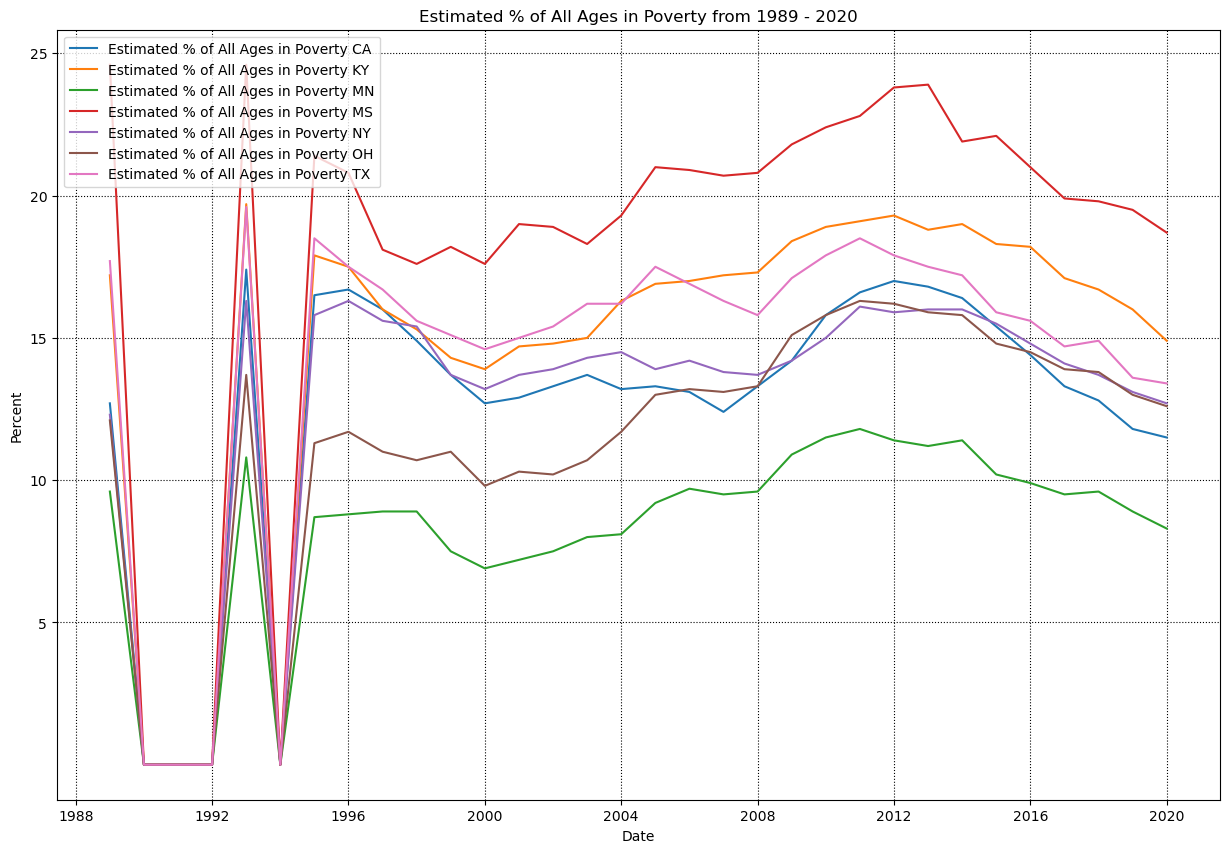

In [42]:
plt.figure(figsize=(15,10))

plt.plot(POV89_20.DATE, POV89_20.CA, label='Estimated % of All Ages in Poverty CA')
plt.plot(POV89_20.DATE, POV89_20.KY, label='Estimated % of All Ages in Poverty KY')
plt.plot(POV89_20.DATE, POV89_20.MN, label='Estimated % of All Ages in Poverty MN')
plt.plot(POV89_20.DATE, POV89_20.MS, label='Estimated % of All Ages in Poverty MS')
plt.plot(POV89_20.DATE, POV89_20.NY, label='Estimated % of All Ages in Poverty NY')
plt.plot(POV89_20.DATE, POV89_20.OH, label='Estimated % of All Ages in Poverty OH')
plt.plot(POV89_20.DATE, POV89_20.TX, label='Estimated % of All Ages in Poverty TX')

plt.title('Estimated % of All Ages in Poverty from 1989 - 2020')
plt.ylabel('Percent')
plt.xlabel('Date')
plt.yticks([5, 10, 15, 20, 25])
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2)

plt.show()